# HowTo Stricke Dir Deinen Klimaschal

Als Scientist for Future sind mir die Klimastreifen, also die “Warming Stripes” natürlich sehr vertraut. Der Klimatologen Ed Hawkins wurde dafür bekannt, die globale Erderhitzung mit einer Reihe farbiger, chronologisch angeordneter Streifen zu veranschaulichen.

Ich habe mir meinen Klimaschal gestrickt. Ich habe dafür die Langzeitdaten der Lufttemperatur meiner Heimatstadt Rostock vom Deutschen Wetterdienst heruntergeladen und eine Strickanleitung berechnet. Die Daten des Deutschen Wetterdienstes sind nämlich frei verfügbar. Für die DWD-Station von Rostock-Warnemünde stehen stündliche Messungen der Lufttemperatur seit 1947 zur Verfügung! Damit kann Ende 2020 ein Schal aus 74 bunten Streifen gestrickt werden!!

Üblicherweise werden die Klimastreifen als sogenannte Anomalien dargestellt. Man zieht von den Messdaten einen Mittelwert ab. Das Ergebnis sind dann negative (kälter als der Mittelwert) oder positive (wärmer als der Mittelwert) Werte. Die kälteren werden oft in Blautönen und die wärmeren in Rottönen dargestellt. Man muss selber entscheiden, über welchen Zeitraum die Daten gemittelt werden sollen. Der IPCC nimmt oft 1961-1990. Damit erhält man aber keine zentrierte Farbskala. Ich habe für den Schal darum den Mittelwert über den Gesamtzeitraum berechnet und abgezogen.

Grundkenntnisse in der freien Programmiersprache R reichen aus, um mit folgendem R-code die Strickanleitung zu erstellen. Mit dem code wird eine Datei mit dem Namen “Klimaschal.csv” mit den berechneten Farben abgespeichert. Die Lufttemperaturdaten, z.B. der Station Rostock-Warnemünde, könnt Ihr manuell auf der Seite des DWD herunterladen, direkt als jährliche Stationswerte: https://cdc.dwd.de/portal/.

In [7]:
####---Laden der R-Bibliotheken---####
library(tidyverse)
library(lubridate)
library(RColorBrewer)

In [11]:
####---Temperaturdaten (Jahresmittel) importieren---####
temp <- read.csv("Jahrestemperaturen.csv")


In [12]:
####---create tibble---####
temp <- tibble(temp) %>%
   rename(Jahr = Zeitstempel) %>%
   select(Jahr, Wert) %>% 
   filter(Jahr >= 1947)

In [13]:
temp

Jahr,Wert
<int>,<dbl>
1947,7.87
1948,9.21
1949,9.51
1950,8.76
1951,8.90
1952,8.01
1953,9.25
1954,7.80
1955,7.97


In [14]:
####---Anomalien berechnen---####
temp$Anom <- temp$Wert - mean(temp$Wert)

In [19]:
####---Jahr im Datum-Format abspeichern---####
temp$Datum <- paste(temp$Jahr, "-01-01", sep="")
temp$Datum <- as.Date(temp$Datum)

In [20]:
temp

Jahr,Wert,Anom,Farbe,Datum
<int>,<dbl>,<dbl>,<fct>,<date>
1947,7.87,-1.09162162,3,1947-01-01
1948,9.21,0.24837838,7,1948-01-01
1949,9.51,0.54837838,7,1949-01-01
1950,8.76,-0.20162162,5,1950-01-01
1951,8.90,-0.06162162,6,1951-01-01
1952,8.01,-0.95162162,3,1952-01-01
1953,9.25,0.28837838,7,1953-01-01
1954,7.80,-1.16162162,3,1954-01-01
1955,7.97,-0.99162162,3,1955-01-01


In [21]:
####---Farbkategorien berechnen---####
#11 Farben (5 blaue, 5 rote und weiß)
temp$Farbe <- 1
range <- 2*max(abs(min(temp$Anom)), abs(max(temp$Anom)))

for(i in 1:11){
  for(j in 1:length(temp$Jahr)){
    if(temp$Anom[j] >= (-0.5*range + (i-1) * range/11)){
      temp$Farbe[j] <- i
    }
  }
}

temp <- temp %>%
   mutate(Farbe = as.factor(Farbe))

In [22]:
####---Daten abspeichern---####
write.csv(temp, "Klimaschal.csv")

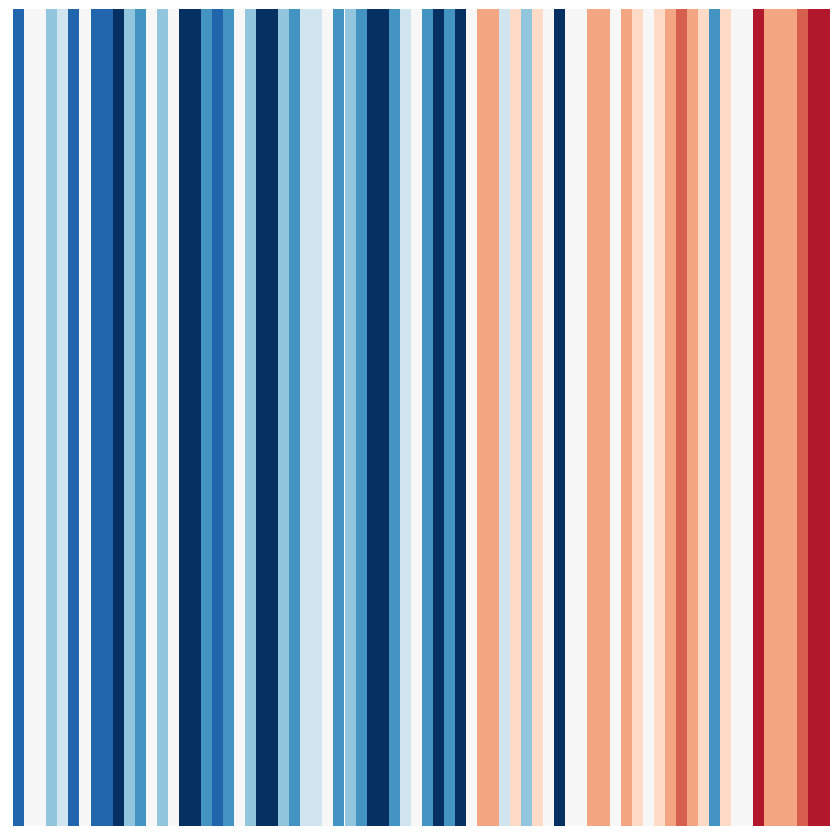

In [23]:
####---Abbildung erstellen---####
col <- brewer.pal(11,"RdBu")

temp %>%
   ggplot(aes(x=Datum, y=1, fill=Farbe)) +
   geom_tile() +
   scale_x_date(date_breaks = "1 year", expand=c(0,0)) +
   scale_y_continuous(expand=c(0,0)) +
   scale_fill_manual(values = rev(col[sort(as.integer(
                     levels(unique(temp$Farbe))))]),
                     guide = FALSE) +
   theme_minimal() +
   theme(axis.text = element_blank(),
         axis.line = element_blank(),
         axis.title = element_blank(),
         panel.grid.major=element_blank(),
         panel.grid.minor=element_blank())

ggsave(filename = "Klimaschal.png", width = 20, height = 6, units = "cm")

In [26]:
col

[1] "#67001F" "#B2182B" "#D6604D" "#F4A582" "#FDDBC7" "#F7F7F7" "#D1E5F0"
 [8] "#92C5DE" "#4393C3" "#2166AC" "#053061"

Das ist das Ergebnis als Bild. Nun müsst Ihr nur noch stricken.